# Predict Bike Sharing Demand with AutoGluon

## Lucia del Valle Ledezma

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
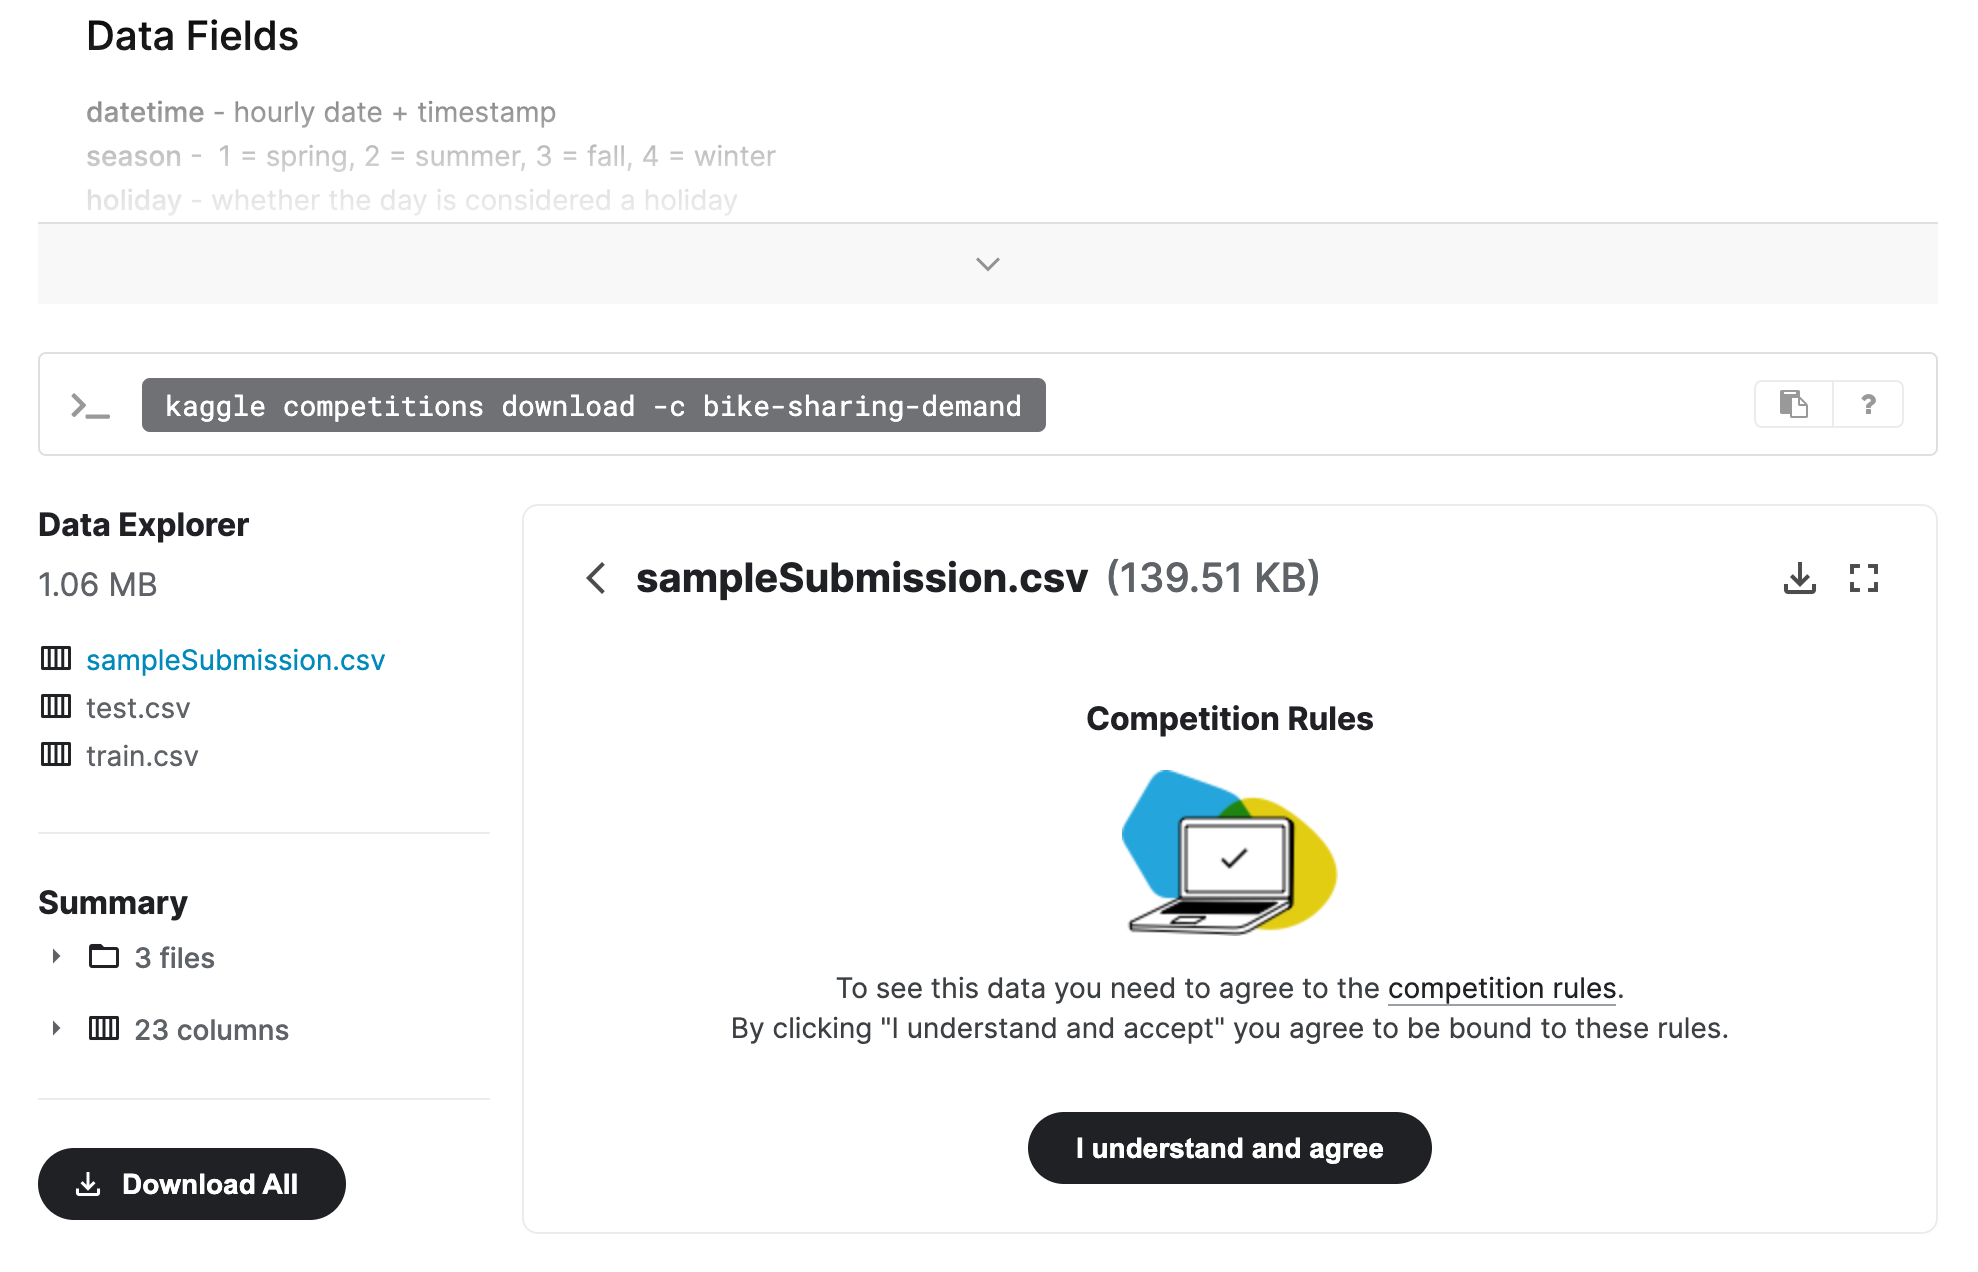

In [3]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!pip install -U kaggle
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-7.0.0-py2.py3-none-any.whl (9.4 kB)
bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [4]:
import pandas as pd
from autogluon.tabular import TabularPredictor

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train["datetime"] = pd.to_datetime(train["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test["datetime"] = pd.to_datetime(test["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [11]:
predictor = TabularPredictor(label="count", eval_metric="root_mean_squared_error", learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(train_data=train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20221229_000649/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221229_000649/"
AutoGluon Version:  0.6.1
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

### Review AutoGluon's training run with ranking of models that did the best.

In [12]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.117461      14.155366  551.307876                0.000868           0.420542            3       True         14
1   RandomForestMSE_BAG_L2  -53.451156      10.487193  411.109396                0.590962          26.193374            2       True         12
2          LightGBM_BAG_L2  -55.097050      10.110964  410.771354                0.214733          25.855333            2       True         11
3          CatBoost_BAG_L2  -55.646882       9.942439  443.270452                0.046208          58.354430            2       True         13
4        LightGBMXT_BAG_L2  -60.364450      13.302595  440.484197                3.406364          55.568176            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.105389    0.030121         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54

### Create predictions from test dataset

In [13]:
predictions = predictor.predict(test)
predictions.head()

0    23.576309
1    42.229565
2    46.156635
3    49.802223
4    52.352642
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [14]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.872604
std        89.904556
min         3.063907
25%        19.718273
50%        64.229752
75%       167.704025
max       365.119995
Name: count, dtype: float64

In [15]:
# How many negative values do we have?
predictions[predictions < 0].count()

0

In [16]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [17]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [18]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 330kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [19]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 3

fileName                       date                 description                          status    publicScore  privateScore  
-----------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission.csv                 2022-12-29 00:17:33  first raw submission                 complete  1.79209      1.79209       
tail: write error: Broken pipe


#### Initial score of 1.79879

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

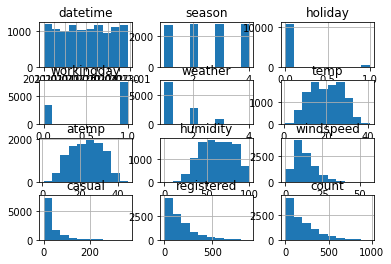

In [20]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [9]:
# create a new feature
train["hour"] = train["datetime"].dt.hour
test["hour"] = test["datetime"].dt.hour
# Model Deployment Workflow. 8. Data Cleasing and Feature Engeneering : datetime parser

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [10]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [11]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


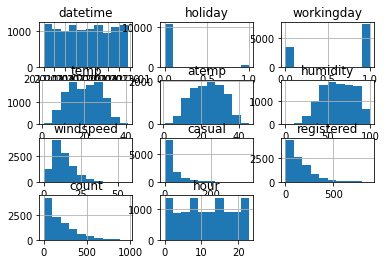

In [12]:
# View histogram of all features again now with the hour feature
train.hist();

## Step 5: Rerun the model with the same settings as before, just with more features

In [25]:
predictor_new_features = TabularPredictor(label="count",eval_metric="root_mean_squared_error", learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20221229_001738/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221229_001738/"
AutoGluon Version:  0.6.1
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [26]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.207381      20.423516  559.298563                0.000740           0.379369            3       True         14
1          CatBoost_BAG_L2  -30.483223      18.499336  474.118758                0.102449          75.169806            2       True         13
2          LightGBM_BAG_L2  -30.581908      18.681674  423.847331                0.284788          24.898378            2       True         11
3        LightGBMXT_BAG_L2  -31.086115      19.437662  430.132512                1.040775          31.183559            2       True         10
4   RandomForestMSE_BAG_L2  -31.652673      18.994765  427.667451                0.597878          28.718498            2       True         12
5      WeightedEnsemble_L2  -32.165529      17.269933  351.233976         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.457273921492806,
  'LightGBM_BAG_L1': -33.919639163586254,
  'RandomForestMSE_BAG_L1': -38.4

In [27]:
# Remember to set all negative values to zero
predictions_n_feature = predictor_new_features.predict(test.loc[:, test.columns != "count"])
print(predictions_n_feature[predictions_n_feature < 0].count())
predictions_n_feature[predictions_n_feature < 0] = 0

0


In [28]:
# Same submitting predictions
submission_new_features = pd.read_csv("sampleSubmission.csv")
submission_new_features["count"] = predictions_n_feature
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [29]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 532kB/s]
Successfully submitted to Bike Sharing Demand

In [30]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 4

fileName                       date                 description                          status    publicScore  privateScore  
-----------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_features.csv    2022-12-29 00:28:27  new features                         complete  0.67743      0.67743       
submission.csv                 2022-12-29 00:17:33  first raw submission                 complete  1.79209      1.79209       
tail: write error: Broken pipe


#### New Score of 0.66228

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [48]:
import autogluon.core as ag

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 2*60  # train various models for ~2 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label="count", problem_type="regression", eval_metric="mean_absolute_error", learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(train_data=train, presets="best_quality",time_limit=600, 
                                    hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs, auto_stack=True)

No model was trained during hyperparameter tuning NeuralNetTorch_BAG_L1... Skipping this model.
Repeating k-fold bagging: 2/20
Fitting model: LightGBM_BAG_L1/T1 ... Training model for up to 232.48s of the 432.44s of remaining time.
		'NoneType' object has no attribute '_user_params_aux'
Detailed Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 1422, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, total_resources=total_resources, **model_fit_kwargs)
  File "/usr/local/lib/python3.8/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 1367, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, total_resources=total_resources, **model_fit_kwargs)
  File "/usr/local/lib/python3.8/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 688, in fit
    kwargs = self._preprocess_fit_args(**kwargs)
  File "/usr/local/lib/python

In [49]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  LightGBM_BAG_L1/T3 -24.116287       0.000116  21.535283                0.000116          21.535283            1       True          3
1  LightGBM_BAG_L1/T2 -25.279046       0.000117  21.363957                0.000117          21.363957            1       True          2
2  LightGBM_BAG_L1/T1 -26.080018       0.000085  20.856626                0.000085          20.856626            1       True          1
3  LightGBM_BAG_L1/T5 -29.479248       0.000078  20.936700                0.000078          20.936700            1       True          5
4  LightGBM_BAG_L1/T4 -95.821896       0.000107  20.647067                0.000107          20.647067            1       True          4
Number of models trained: 5
Types of models trained:
{'StackerEnsembleModel_LGB'}
Bagging used: True  (with 8 folds)

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB'},
 'model_performance': {'LightGBM_BAG_L1/T1': -26.080018387473988,
  'LightGBM_BAG_L1/T2': -25.2790461297604,
  'LightGBM_BAG_L1/T3': -24.116287297559463,
  'LightGBM_BAG_L1/T4': -95.8218964452847,
  'LightGBM_BAG_L1/T5': -29.479248186605897},
 'model_best': None,
 'model_paths': {'LightGBM_BAG_L1/T1': '/root/AWS_project_bike_sharing_Ledezma_Lucia_del-Valle/project/AutogluonModels/ag-20230104_040238/models/LightGBM_BAG_L1/T1/',
  'LightGBM_BAG_L1/T2': '/root/AWS_project_bike_sharing_Ledezma_Lucia_del-Valle/project/AutogluonModels/ag-20230104_040238/models/LightGBM_BAG_L1/T2/',
  'LightGBM_BAG_L1/T3': '/root/AWS_project_bike_sharing_Ledezma_Lucia_del-Valle/project/AutogluonModels/ag-20230104_040238/models/LightGBM_BA

In [25]:
# Remember to set all negative values to zero
predictions_hpo = predictor_new_hpo.predict(test)
print(predictions_hpo[predictions_hpo < 0].count())
predictions_hpo[predictions_hpo < 0] = 0

0


In [26]:
submission_new_hpo = pd.read_csv("sampleSubmission.csv")

In [27]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [28]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 341kB/s]
Successfully submitted to Bike Sharing Demand

In [29]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 5

fileName                         date                 description                          status    publicScore  privateScore  
-------------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv           2023-01-04 03:32:11  new features with hyperparameters    complete  0.55554      0.55554       
submission_new_hpo.csv           2023-01-04 03:26:11  new features with hyperparameters    complete  1.18225      1.18225       
submission_new_features_hpo.csv  2022-12-29 01:14:16  new hp -> num_bag_folds=5            complete  0.63972      0.63972       
tail: write error: Broken pipe


#### New Score of 0.69357

In [38]:
## Stand Out Suggestions

In [30]:
# Adding new features

train["day"] = train["datetime"].dt.day
test["day"] = test["datetime"].dt.day
train["month"] = train["datetime"].dt.month
test["month"] = test["datetime"].dt.month
train["year"] = train["datetime"].dt.year
test["year"] = test["datetime"].dt.year


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int64         
 13  day         10886 non-null  int64         
 14  month       10886 non-null  int64         
 15  year        10886 non-null  int64         
dtypes: category(2), dateti

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   category      
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   category      
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   hour        6493 non-null   int64         
 10  day         6493 non-null   int64         
 11  month       6493 non-null   int64         
 12  year        6493 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(7)
memory usage: 571.2 KB


### I am going to ignore the datetime column because it was splitted in four parts :year, month, day and hour

In [33]:
## training with new features
predictor_new_features_2 = TabularPredictor(label="count", problem_type="regression", eval_metric="mean_absolute_error", learner_kwargs={"ignored_columns": ["casual", "registered", "datetime"]}).fit(train_data=train, presets="best_quality",
                                            time_limit=600, hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20230104_033457/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230104_033457/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered', 'datetime']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2498.85 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of 

In [46]:
predictor_new_features_2.fit_summary()

FileNotFoundError: [Errno 2] No such file or directory: 'AutogluonModels/ag-20230104_033457/models/LightGBM_BAG_L1/model.pkl'

In [35]:
# Remember to set all negative values to zero
predictions_n_features_2 = predictor_new_features_2.predict(test.loc[:, test.columns != "datetime"])
print(predictions_n_features_2[predictions_n_features_2 < 0].count())
predictions_n_features_2[predictions_n_features_2 < 0] = 0
submission_new_features_2 = pd.read_csv("sampleSubmission.csv")

6


In [36]:
submission_new_features_2["count"] = predictions_n_features_2
submission_new_features_2.to_csv("submission_new_features_2.csv", index=False)

!kaggle competitions submit -c bike-sharing-demand -f submission_new_features_2.csv -m "new features -> day, month and year"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 337kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                         date                 description                          status    publicScore  privateScore  
-------------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_features_2.csv    2023-01-04 03:38:58  new features -> day, month and year  complete  0.56591      0.56591       
submission_new_hpo.csv           2023-01-04 03:32:11  new features with hyperparameters    complete  0.55554      0.55554       
submission_new_hpo.csv           2023-01-04 03:26:11  new features with hyperparameters    complete  1.18225      1.18225       
submission_new_features_hpo.csv  2022-12-29 01:14:16  new hp -> num_bag_folds=5            complete  0.63972      0.63972       
tail: write error: Broken pipe


## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

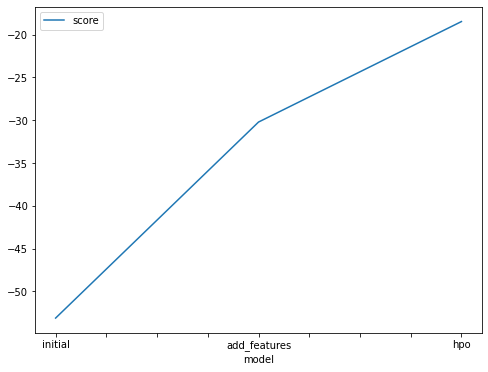

In [70]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.117461 ,-30.207381 ,-18.462326]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_train_score.png')

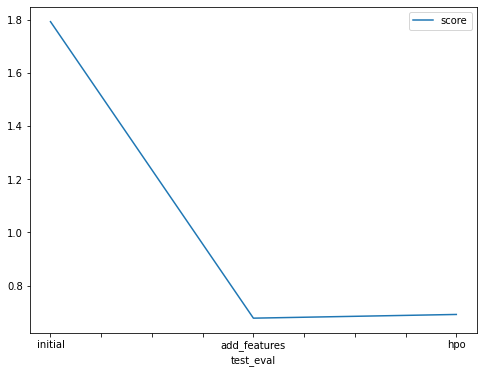

In [71]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score":[ 1.79209, 0.67743, 0.69137]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_test_score.png')

### Hyperparameter table

In [72]:
# The 3 hyperparameters we tuned with the kaggle score as the result
df = pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "time_limit": [600, 600, 700],
    "eval_metric": ["root_mean_square_error", "root_mean_square_error", "mean_absolute_error"],
    "presets": ["best_quality", "best_quality", "high_quality"],
    "score":[ 1.79209, 0.67743, 0.69137]
})
df.to_csv("ext/summary.csv")
df.head()

,model,time_limit,eval_metric,presets,score
0,initial,600,root_mean_square_error,best_quality,1.79209
1,add_features,600,root_mean_square_error,best_quality,0.67743
2,hpo,700,mean_absolute_error,high_quality,0.69137


### This section is extra. Stand Out Suggestions.

In [73]:
### Correlation Matrix.
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
holiday,1.000000,-0.250491,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.000354,-0.015877,0.001731,0.012021
workingday,-0.250491,1.000000,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.002780,0.009829,-0.003394,-0.002482
temp,0.000295,0.029966,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.145430,0.015551,0.257589,0.061226
atemp,-0.005215,0.024660,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.140343,0.011866,0.264173,0.058540
humidity,0.001929,-0.010880,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.278011,-0.011335,0.204537,-0.078606
windspeed,0.008409,0.013373,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.146631,0.036157,-0.150192,-0.015221
casual,0.043799,-0.319111,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.302045,0.014109,0.092722,0.145241
registered,-0.020956,0.119460,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.380540,0.019111,0.169451,0.264265
count,-0.005393,0.011594,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,0.400601,0.019826,0.166862,0.260403
hour,-0.000354,0.002780,0.145430,0.140343,-0.278011,0.146631,0.302045,0.380540,0.400601,1.000000,0.001132,-0.006818,-0.004234


How we can see, the variables temp and atemp are very correlated with a score of 0.984948.

<AxesSubplot:xlabel='datetime'>

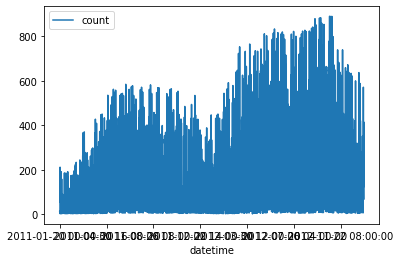

In [74]:
### Time series on  the best model
submission_new_features_2.plot( 'datetime' , 'count')

In the figure above, we can notice that model predict an increase in bike sharing demand for the last months of the year.

### With the last model "predictor_new_feautes_2"

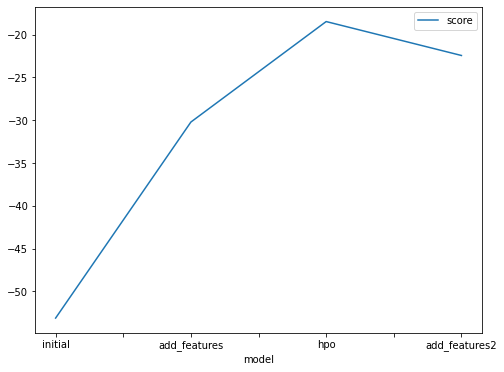

In [75]:
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo",  "add_features2"],
        "score":  [-53.117461 ,-30.207381 ,-18.462326, -22.427536] 
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_train_extended_score.png')

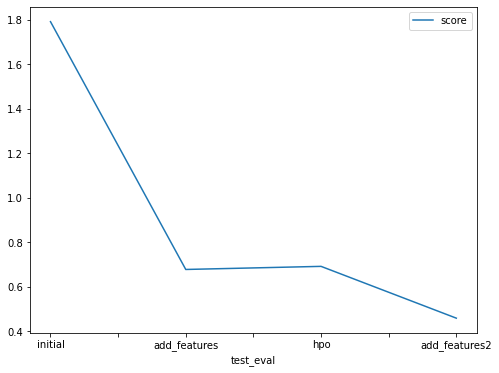

In [76]:
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo", "add_features2"],
        "score": [ 1.79209, 0.67743, 0.69137, 0.45839]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_test_extended_score.png')

In [77]:
df = pd.DataFrame({
    "model": ["initial", "add_features", "hpo", "add_features_2"],
    "time_limit": [600, 600, 700, 700],
    "eval_metric": ["root_mean_square_error", "root_mean_square_error", "mean_absolute_error", "mean_absolute_error"],
    "presets": ["best_quality", "best_quality", "high_quality", "high_quality"],
    "score":[ 1.79209, 0.67743, 0.69137, 0.45839]
})
df.to_csv("ext/summary_extended.csv")
df.head()

,model,time_limit,eval_metric,presets,score
0,initial,600,root_mean_square_error,best_quality,1.79209
1,add_features,600,root_mean_square_error,best_quality,0.67743
2,hpo,700,mean_absolute_error,high_quality,0.69137
3,add_features_2,700,mean_absolute_error,high_quality,0.45839
